## Plan de investigación 

### Problema
¿Cómo se compara el algoritmo divide y conquista más eficiente temporalmente con el algoritmo de ordenamiento por intercambio de adyacentes más eficiente temporalmente? ¿En qué casos es posible recomendar el uso de una categoría de algoritmos de ordenamiento sobre la otra?

### Hipótesis
* Se conoce que en el caso promedio del algoritmo quicksort tiene un comportamiento de O(nlog(n)), mientras el algoritmo de inserción en su caso promedio mantiene un comportamiento $n^2$, con ello quicksort se puede ir viendo una opción que puede reducir en gran medida la complejidad del tiempo y por consiguiente el más apto en funciones con listas muy grandes. Sin embargo al tratar algoritmos con listas de un tamaño pequeño se recomienda a mayor manera el algoritmo de inserción ya que este suele ser más eficaz debido a su comportamiento exponencial, mientras quicksort tiene un comportamiento logarítmico y eso provoca un pico en tiempo en cuanto a listas pequeñas. A la hora de recomendar el uso de una categoría se puede analizar la complejidad del problema y estudiar el largo de las listas para descubrir cual es el algoritmo más apto.

### Metodologia 
* Se van a estudiar los rendimientos de ambos algoritmos mediante un set de experimentos.

####  1- Implementación de listas para casos   
     
   En este caso vamos a presentar un conjunto de listas en las que se va a demostrar cada uno de los casos (mejor, peor y promedio) de ambos algoritmos con el que vamos a medir sus posibilidades de éxito y sus fallas en el proceso. 
   
   Para ambas listas se pueden utilizar la mismas listas de mejor, peor y caso promedio
  
  - Mejor caso: Para el mejor caso las listas van a ser ordenadas ascendentemente 
      
      mejor_caso(n): [1,2,3,4,5,6]
  
  
  - Peor caso: Para el peor caso las listas van a ser ordenadas descendentemente
  
      peor_caso(n): [5,4,3,2,1]
      
  
  - Caso promedio: Para el caso promedio las listas no se ordenan de manera aleatoria con ayuda de la herramienta shuffle.
  
      caso_promedio(n): [1,3,5,2,4]
    
      
                   
De acuerdo con el resultado teórico, se espera un valor de  $r^2$  cercano a 1.

Adicionalmente se graficarán los resultados de tiempo de ejecución y la función de complejidad aproximada por big_o.


#### 2- Verificacion de complejidad temporal.
  Para medir la complejidad temporal de ambos algoritmos se va a utilizar la biblioteca `Big O`con los siguientes parámetros: 

Parámetros para la función Big O en QuickSort:
* `min_n` = 10
* `max_n` = 1000
* `n_measures` = 990
* `n_repeats` = 3
* `classes` = `[cls.Linearithmic]`
* `Lista` 

Parámetros para la función Big O en Inserción:
* `min_n` = 10
* `max_n` = 1000
* `n_measures` = 990
* `n_repeats` = 3
* `classes` = `[cls.Quadratic]`
* `Lista` 


#### 3- Efectividad de cada uno

 Se van a graficar los rendimientos de los algoritmos con ayuda de la biblioteca `matplotlib.pyplot` y con ello se van a poder comparar los tiempos conforme el tamaño de la entrada crece.

In [13]:
from big_o import big_o
from big_o import complexities as cls

import generador_listas as gl
import implementación_algoritmos 

import random
import numpy as np
import pandas as pd

### Codigo de pruebas

In [14]:
def aprox_asintotica(datos):
    ys = datos['times']
    for k, v in datos.items():
        if isinstance(k, cls.ComplexityClass):
            residual = v
            r2 = 1 - residual / (ys.size * ys.var())
            print(k, f' (r={residual}, r^2={r2})')

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(etiqueta_xs, xs, etiqueta_ys, ys):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(xs, ys)
    plt.ylabel(etiqueta_ys)
    plt.xlabel(etiqueta_xs)
    plt.show()

def plot_hist(etiqueta_xs, etiqueta_ys, ys):
    fig, ax = plt.subplots()
    ax.hist(ys, bins=10)
    plt.xlabel(etiqueta_xs)
    plt.ylabel(etiqueta_ys)
    plt.show()

### Algoritmos 

#### Algoritmo de ordenamiento por inserción 

In [16]:
from implementación_algoritmos import insercion

#### Algoritmo de ordenamiento quicksort

In [17]:
from implementación_algoritmos import quicksort_promedio

### Resultados 

In [18]:
clase, datos = big_o(lambda A: insercion(A), 
                     gl.generar_caso_promedio,
                     min_n=10, max_n=1000,
                     n_measures=990, n_repeats=3,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Quadratic])

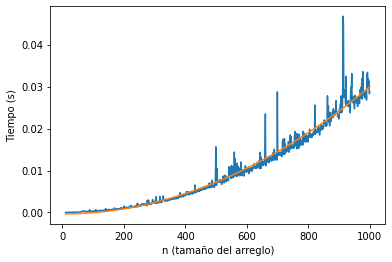

In [19]:
prom_xs = datos['measures']
prom_ys = datos['times']
prom_aprox_insercion = clase.compute(prom_xs)

plt.plot(prom_xs, prom_ys)
plt.plot(prom_xs, prom_aprox_insercion, label = 'aprox')
plt.ylabel('Tiempo (s)')
plt.xlabel('n (tamaño del arreglo)')
plt.show()

In [20]:
aprox_asintotica(datos)

Quadratic: time = -0.00035 + 3E-08*n^2 (sec)  (r=0.002305932799635873, r^2=0.9721301576256489)


In [21]:
clase, datos = big_o(lambda A: quicksort_promedio(A), 
                     gl.generar_caso_promedio,
                     min_n=10, max_n=1000,
                     n_measures=990, n_repeats=3,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linearithmic])

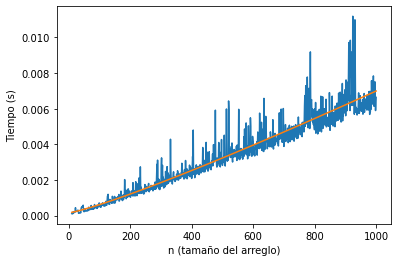

In [22]:
prom_xs = datos['measures']
prom_ys = datos['times']
prom_aprox_quicksort = clase.compute(prom_xs)

plt.plot(prom_xs, prom_ys)
plt.plot(prom_xs, prom_aprox_quicksort, label = 'aprox')
plt.ylabel('Tiempo (s)')
plt.xlabel('n (tamaño del arreglo)')
plt.show()

In [23]:
aprox_asintotica(datos)

Linearithmic: time = 0.00016 + 9.9E-07*n*log(n) (sec)  (r=0.00037524817685586037, r^2=0.9139896659578697)


  9. Se recomienda el algoritmo más eficiente
  

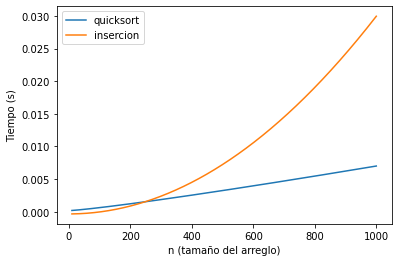

In [24]:
plt.plot(prom_xs, prom_aprox_quicksort, label = 'quicksort')
plt.plot(prom_xs, prom_aprox_insercion, label = 'insercion')
plt.ylabel('Tiempo (s)')
plt.xlabel('n (tamaño del arreglo)')
plt.legend(loc = 2)
plt.show()

### Análisis de resultados

- En el experimento 1 se visualiza lo que es el comportamiento del algoritmo de inserción, se puede ver que tiene un comportamiento exponencial, tiene un rendimiento positivo al inicio, sin embargo cuando aumenta el tamaño de la entrada su curva temporal empieza a aumentar considerablemente.


- En el experimento 2 se visualiza lo que es el comportamiento del algoritmo de quicksort, se puede ver que tiene un comportamiento linearítmico, tiene un rendimiento muy similar independientemente de la cantidad de aumentos que haya en su entrada, tiene una curva muy constante.


- En el experimento 3 se hace una comparación entre los resultados de ambos grafico en los cuales se puede apreciar como inicialmente es más eficiente el algoritmo de inserción, sin embargo conforme crece el tamaño de la entrada el algoritmo de quicksort tiene una mayor eficiencia.


### Conclusión 
Debido a los experimentos y pruebas realizadas anteriormente, podemos concluir que la hipótesis planteada inicialmente es correcta, ya que al realizar la comparación mediante una grafica, podemos observar como el algoritmo de inserción es más eficiente con listas de menor tamaño y conforme aumenta la entrada, el algoritmo tiene una curva temporal más pronunciada a diferencia de quicksort que se mantiene un crecimiento lento aún cuando el tamaño de la lista aumenta.
